# Ciência dos Dados - PROJETO 1

Pedro Awad Roxo da Fonseca, 1 C

## Evolução do acesso a TV das classes C, D e E no Sudeste

O mundo moderno vive em constante mudança, dentre elas o avanço de tecnologias é um dos mais comuns. Dentre elas a televisão é uma das mais evidentes por marcar presença enorme na vida da grande maioria das pessoas. Contudo para acompanhar tais avanços tecnológicos costuma ser necessário um investimento considerável fazendo com que estar atualizado tecnológicamente falando seja algo para poucos. Neste trabalho faremos uma análise profunda da Pesquisa Nacional de Amostra de Domicílios (PNAD) com foco específico para a área urbana da região mais desenvolvida do Brasil, a Sudeste e assim buscar responder a pergunta: Como se deu a evolução do acesso a TV das classes C, D e E no Sudeste?

___
## Análise e Resultados

Importação das bibliotecas necessárias.

In [269]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Leitura das bases de dados dos três anos (2013, 2014, 2015).

In [270]:
dados15=pd.read_csv('DOM2015.csv',sep=',')
dados14=pd.read_csv('DOM2014.csv',sep=',')
dados13=pd.read_csv('DOM2013.csv',sep=',')

   Na três células a seguir as bases passaram por "limpezas", isto é, as três planilhas tiveram todas as colunas desnecessárias para análise retiradas,colunas renomeadas e variáveis filtradas. Também foi criada, em cada uma das bases de dados uma nova coluna que especifica o nível de modernização da televisão do respectivo indivíduo, isso tomando como base a técnologia mais moderna que este tem disponível em seu domcílio.

In [271]:
dados13.loc[(dados13.UF>30)&(dados13.UF<36),"REGIAO"]="Sudeste"
dados13.REGIAO=dados13.REGIAO.astype('category')
dados13.loc[(dados13.V4622==1),'CLASSE']='E'
dados13.loc[(dados13.V4622==2),'CLASSE']='E'
dados13.loc[(dados13.V4622==3),'CLASSE']='E'
dados13.loc[(dados13.V4622==4), 'CLASSE']='D'
dados13.loc[(dados13.V4622==5), 'CLASSE']='D'
dados13.loc[(dados13.V4622==6), 'CLASSE']='C'
dados13.V4105=dados13.V4105.astype('category')
dados13.V0226=dados13.V0226.astype('category')
dados13.V0226.cat.categories=('Sim','Não')
dados13.V02272=dados13.V02272.astype('category')
dados13.V02272.cat.categories=('Sim','Não')
dados13.V02273=dados13.V02273.astype('category')
dados13.V02273.cat.categories=('Sim','Não','Não sabe')
dados13.V02274=dados13.V02274.astype('category')
dados13.V02274.cat.categories=('Sim','Não','Não sabe')
dados13=dados13.loc[:,["REGIAO","CLASSE","V0226","V02272","V02273","V02274"]]
dados13.columns=["REGIAO",'CLASSE','TV COM COR','TV POR ASSINATURA','TV ABERTA DIGITAL','TV POR PARABÓLICA']
dados13.loc[(dados13['TV POR PARABÓLICA']=="Sim")&(dados13['TV POR ASSINATURA']=="Não")&(dados13['TV ABERTA DIGITAL']=='Não'), "Nível de Modernizacao"]="Parabólica"
dados13.loc[(dados13['TV POR PARABÓLICA']=="Sim")&(dados13['TV POR ASSINATURA']=="Não")&(dados13['TV ABERTA DIGITAL']=='Sim') | (dados13['TV POR PARABÓLICA']=="Não")&(dados13['TV POR ASSINATURA']=="Não")&(dados13['TV ABERTA DIGITAL']=='Sim'), "Nível de Modernizacao"]="Aberta Digital"
dados13.loc[(dados13['TV POR PARABÓLICA']=="Sim")&(dados13['TV POR ASSINATURA']=="Sim")&(dados13['TV ABERTA DIGITAL']=='Sim') | (dados13['TV POR PARABÓLICA']=="Sim")&(dados13['TV POR ASSINATURA']=="Sim")&(dados13['TV ABERTA DIGITAL']=='Não') | (dados13['TV POR PARABÓLICA']=="Não")&(dados13['TV POR ASSINATURA']=="Sim")&(dados13['TV ABERTA DIGITAL']=='Sim') | (dados13['TV POR PARABÓLICA']=="Não")&(dados13['TV POR ASSINATURA']=="Sim")&(dados13['TV ABERTA DIGITAL']=='Não'), "Nível de Modernizacao"]="Por Assinatura"
dados13=dados13[(dados13.REGIAO=="Sudeste")]
dados13=dados13[(dados13["TV COM COR"]=="Sim")]
dados13=dados13.loc[:,["CLASSE","TV POR ASSINATURA","TV ABERTA DIGITAL","TV POR PARABÓLICA","Nível de Modernizacao"]]
dados13=dados13.dropna(subset=['Nível de Modernizacao'])
dados13=dados13.dropna(subset=["CLASSE"])

In [272]:
dados14.loc[(dados14.UF>30)&(dados14.UF<36),"REGIAO"]="Sudeste"
dados14.REGIAO=dados14.REGIAO.astype('category')
dados14.loc[(dados14.V4622==1),'CLASSE']='E'
dados14.loc[(dados14.V4622==2),'CLASSE']='E'
dados14.loc[(dados14.V4622==3),'CLASSE']='E'
dados14.loc[(dados14.V4622==4), 'CLASSE']='D'
dados14.loc[(dados14.V4622==5), 'CLASSE']='D'
dados14.loc[(dados14.V4622==6), 'CLASSE']='C'
dados14.V4105=dados14.V4105.astype('category')
dados14.V0226=dados14.V0226.astype('category')
dados14.V0226.cat.categories=('Sim','Não')
dados14.V02272=dados14.V02272.astype('category')
dados14.V02272.cat.categories=('Sim','Não')
dados14.V02273=dados14.V02273.astype('category')
dados14.V02273.cat.categories=('Sim','Não','Não sabe')
dados14.V02274=dados14.V02274.astype('category')
dados14.V02274.cat.categories=('Sim','Não','Não sabe')
dados14=dados14.loc[:,["REGIAO","CLASSE","V0226","V02272","V02273","V02274"]]
dados14.columns=["REGIAO",'CLASSE','TV COM COR','TV POR ASSINATURA','TV ABERTA DIGITAL','TV POR PARABÓLICA']
dados14.loc[(dados14['TV POR PARABÓLICA']=="Sim")&(dados14['TV POR ASSINATURA']=="Não")&(dados14['TV ABERTA DIGITAL']=='Não'), "Nível de Modernizacao"]="Parabólica"
dados14.loc[(dados14['TV POR PARABÓLICA']=="Não")&(dados14['TV POR ASSINATURA']=="Não")&(dados14['TV ABERTA DIGITAL']=='Sim') | (dados14['TV POR PARABÓLICA']=="Sim")&(dados14['TV POR ASSINATURA']=="Não")&(dados14['TV ABERTA DIGITAL']=='Sim'), "Nível de Modernizacao"]="Aberta Digital"
dados14.loc[(dados14['TV POR PARABÓLICA']=="Sim")&(dados14['TV POR ASSINATURA']=="Sim")&(dados14['TV ABERTA DIGITAL']=='Sim') | (dados14['TV POR PARABÓLICA']=="Sim")&(dados14['TV POR ASSINATURA']=="Sim")&(dados14['TV ABERTA DIGITAL']=='Não') | (dados14['TV POR PARABÓLICA']=="Não")&(dados14['TV POR ASSINATURA']=="Sim")&(dados14['TV ABERTA DIGITAL']=='Não') | (dados14['TV POR PARABÓLICA']=="Não")&(dados14['TV POR ASSINATURA']=="Sim")&(dados14['TV ABERTA DIGITAL']=='Sim'), "Nível de Modernizacao"]="Por Assinatura"
dados14=dados14[(dados14.REGIAO=="Sudeste")]
dados14=dados14[(dados14["TV COM COR"]=="Sim")]
dados14=dados14.loc[:,["CLASSE","TV POR ASSINATURA","TV ABERTA DIGITAL","TV POR PARABÓLICA","Nível de Modernizacao"]]
dados14=dados14.dropna(subset=['Nível de Modernizacao'])
dados14=dados14.dropna(subset=["CLASSE"])

In [273]:
dados15.loc[(dados15.UF>30)&(dados15.UF<36),"REGIAO"]="Sudeste"
dados15.REGIAO=dados15.REGIAO.astype('category')
dados15.loc[(dados15.V4622==1),'CLASSE']='E'
dados15.loc[(dados15.V4622==2),'CLASSE']='E'
dados15.loc[(dados15.V4622==3),'CLASSE']='E'
dados15.loc[(dados15.V4622==4), 'CLASSE']='D'
dados15.loc[(dados15.V4622==5), 'CLASSE']='D'
dados15.loc[(dados15.V4622==6), 'CLASSE']='C'
dados15.V4105=dados15.V4105.astype('category')
dados15.V0226=dados15.V0226.astype('category')
dados15.V0226.cat.categories=('Sim','Não')
dados15.V02272=dados15.V02272.astype('category')
dados15.V02272.cat.categories=('Sim','Não')
dados15.V02273=dados15.V02273.astype('category')
dados15.V02273.cat.categories=('Sim','Não','Não sabe')
dados15.V02274=dados15.V02274.astype('category')
dados15.V02274.cat.categories=('Sim','Não','Não sabe')
dados15=dados15.loc[:,["REGIAO","CLASSE","V0226","V02272","V02273","V02274"]]
dados15.columns=["REGIAO",'CLASSE','TV COM COR','TV POR ASSINATURA','TV ABERTA DIGITAL','TV POR PARABÓLICA']
dados15.loc[(dados15['TV POR PARABÓLICA']=="Sim")&(dados15['TV POR ASSINATURA']=="Não")&(dados15['TV ABERTA DIGITAL']=='Não'), "Nível de Modernizacao"]="Parabólica"
dados15.loc[(dados15['TV POR PARABÓLICA']=="Sim")&(dados15['TV POR ASSINATURA']=="Não")&(dados15['TV ABERTA DIGITAL']=='Sim'), "Nível de Modernizacao"]="Aberta Digital"
dados15.loc[(dados15['TV POR PARABÓLICA']=="Não")&(dados15['TV POR ASSINATURA']=="Não")&(dados15['TV ABERTA DIGITAL']=='Sim'), "Nível de Modernizacao"]="Aberta Digital"
dados15.loc[(dados15['TV POR PARABÓLICA']=="Sim")&(dados15['TV POR ASSINATURA']=="Sim")&(dados15['TV ABERTA DIGITAL']=='Sim'), "Nível de Modernizacao"]="Por Assinatura"
dados15.loc[(dados15['TV POR PARABÓLICA']=="Sim")&(dados15['TV POR ASSINATURA']=="Sim")&(dados15['TV ABERTA DIGITAL']=='Não'), "Nível de Modernizacao"]="Por Assinatura"
dados15.loc[(dados15['TV POR PARABÓLICA']=="Não")&(dados15['TV POR ASSINATURA']=="Sim")&(dados15['TV ABERTA DIGITAL']=='Sim'), "Nível de Modernizacao"]="Por Assinatura"
dados15.loc[(dados15['TV POR PARABÓLICA']=="Não")&(dados15['TV POR ASSINATURA']=="Sim")&(dados15['TV ABERTA DIGITAL']=='Não'), "Nível de Modernizacao"]="Por Assinatura"
dados15=dados15[(dados15.REGIAO=="Sudeste")]
dados15=dados15[(dados15["TV COM COR"]=="Sim")]
dados15=dados15.loc[:,["CLASSE","TV POR ASSINATURA","TV ABERTA DIGITAL","TV POR PARABÓLICA","Nível de Modernizacao"]]
dados15=dados15.dropna(subset=['Nível de Modernizacao'])
dados15=dados15.dropna(subset=["CLASSE"])

Primeiramente, nós vemos a diminuição percentual da presença do sinal de televisão por meio da antena parabólica ao longo dos três anos. Assim podemos observar que as classes médias/baixas vem abrindo mão daquele que pode ser considerado o meio mais "primitivo" de acesso a sinal de TV.

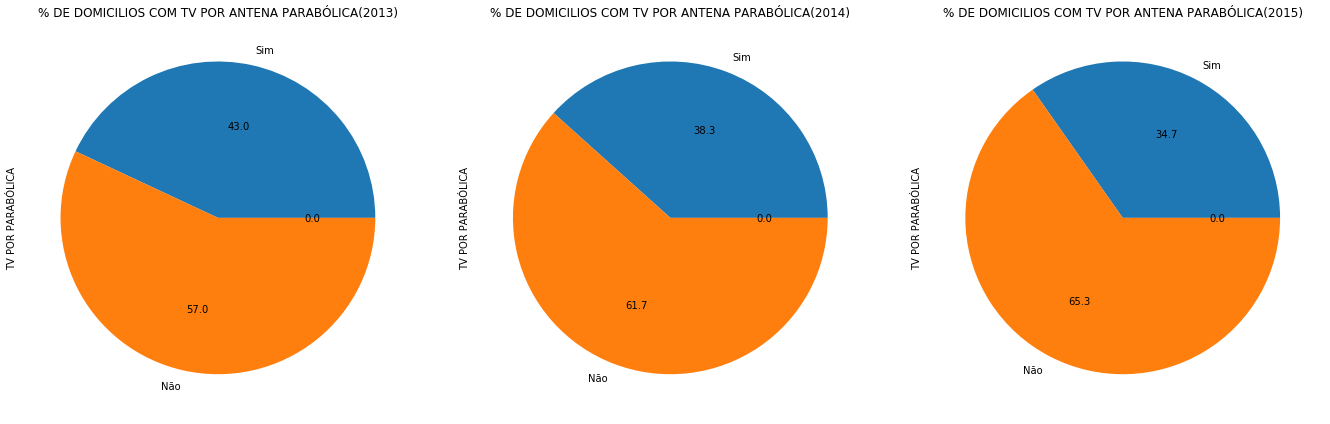

In [274]:
d13=(dados13["TV POR PARABÓLICA"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig=plt.figure(figsize=(19, 6))
plt.subplot(131)
plot=d13.plot(kind='pie',title='% DE DOMICILIOS COM TV POR ANTENA PARABÓLICA(2013)',autopct='%.1f')                        

d14=(dados14["TV POR PARABÓLICA"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
plt.subplot(132)
plot=d14.plot(kind='pie',title='% DE DOMICILIOS COM TV POR ANTENA PARABÓLICA(2014)',autopct='%.1f')                        

d15=(dados15["TV POR PARABÓLICA"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
plt.subplot(133)
plot=d15.plot(kind='pie',title='% DE DOMICILIOS COM TV POR ANTENA PARABÓLICA(2015)',autopct='%.1f')                        
plt.tight_layout()
plt.show()

Em seguida, como já poderia ser esperado, se vê um crescimento percentual dos domicílios que possuem TV aberta digital. Isso é porvavelmente uma consequência do maior investimento no entreterimento pelas classes em questão ou ou até uma maior facilidade da chegada da técnologia necessária aos domicílios.

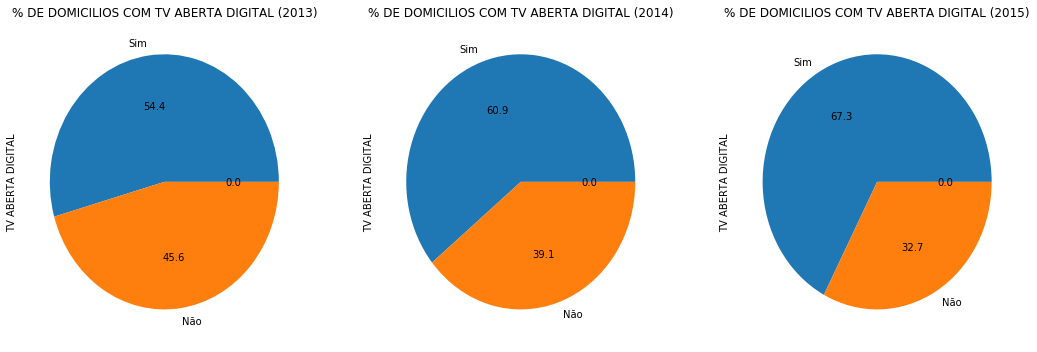

In [275]:
d13=(dados13["TV ABERTA DIGITAL"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig=plt.figure(figsize=(15, 5))
plt.subplot(131)
plot=d13.plot(kind='pie',title='% DE DOMICILIOS COM TV ABERTA DIGITAL (2013)',autopct='%.1f')                        

d14=(dados14["TV ABERTA DIGITAL"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
plt.subplot(132)
plot=d14.plot(kind='pie',title='% DE DOMICILIOS COM TV ABERTA DIGITAL (2014)',autopct='%.1f')                        

d15=(dados15["TV ABERTA DIGITAL"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
plt.subplot(133)
plot=d15.plot(kind='pie',title='% DE DOMICILIOS COM TV ABERTA DIGITAL (2015)',autopct='%.1f')                        
plt.tight_layout()
plt.show()

Por fim, pode se ver nos gráficos abaixo como se variou a presença da TV por assinatura nos domicílios das classes C, D e E no Sudeste brasileiro. Analisando-os pode-se notar facilmente que a variação da adesão a TV a por assinatura, que pode ser considerada a mais moderna disponível, foi muito pequena no três anos em questão.

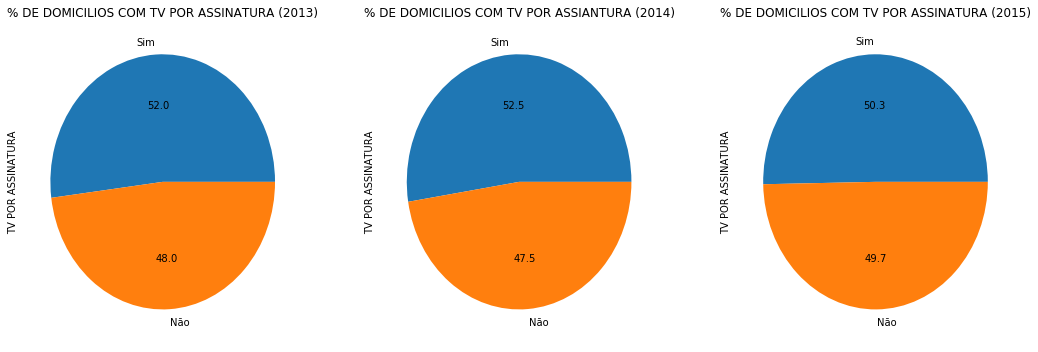

In [276]:
d13=(dados13["TV POR ASSINATURA"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig=plt.figure(figsize=(15, 5))
plt.subplot(131)
plot=d13.plot(kind='pie',title='% DE DOMICILIOS COM TV POR ASSINATURA (2013)',autopct='%.1f')                        

d14=(dados14["TV POR ASSINATURA"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
plt.subplot(132)
plot=d14.plot(kind='pie',title='% DE DOMICILIOS COM TV POR ASSIANTURA (2014)',autopct='%.1f')                        

d15=(dados15["TV POR ASSINATURA"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
plt.subplot(133)
plot=d15.plot(kind='pie',title='% DE DOMICILIOS COM TV POR ASSINATURA (2015)',autopct='%.1f')                        
plt.tight_layout()
plt.show()

Unindo os gráficos previamente apresentados se têm o exposto a seguir. Nele, pode se ver mais claramente como se teve a ascensão da TV aberta digital e a diminuição na presença da telvisão por antena parabólica. Também pode se notar que não houve variação relevante quanto ao percentual de domicílios com TV por assinatura. Deve se notar que todos os gráficos apresentos a partir desse ponto não contam mais o total de pessoas que possue tal acesso à TV. Para melhor análise da questão trabalhada foi criada uma variável chamada de "Nível de Modernização" que considera apenas a proveniência mais modernade TV presente naquele domicílio. 

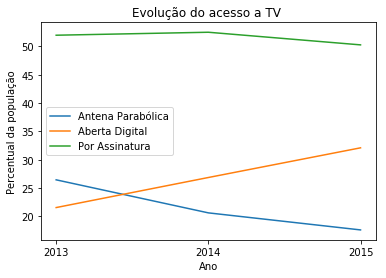

In [277]:
p13=dados13['Nível de Modernizacao'].str.count('Parabólica').sum()
ad13=dados13['Nível de Modernizacao'].str.count('Aberta Digital').sum()
pa13=dados13['Nível de Modernizacao'].str.count('Por Assinatura').sum()
t13=p13+ad13+pa13
p13=100*p13/t13
ad13=100*ad13/t13
pa13=100*pa13/t13
p14=dados14['Nível de Modernizacao'].str.count('Parabólica').sum()
ad14=dados14['Nível de Modernizacao'].str.count('Aberta Digital').sum()
pa14=dados14['Nível de Modernizacao'].str.count('Por Assinatura').sum()
t14=p14+ad14+pa14
p14=100*p14/t14
ad14=100*ad14/t14
pa14=100*pa14/t14
p15=dados15['Nível de Modernizacao'].str.count('Parabólica').sum()
ad15=dados15['Nível de Modernizacao'].str.count('Aberta Digital').sum()
pa15=dados15['Nível de Modernizacao'].str.count('Por Assinatura').sum()
t15=p15+ad15+pa15
p15=100*p15/t15
ad15=100*ad15/t15
pa15=100*pa15/t15

P=[p13,p14,p15]
AD=[ad13,ad14,ad15]
PA=[pa13,pa14,pa15]

anos=['2013','2014','2015']
plt.plot(anos,P)
plt.plot(anos,AD)
plt.plot(anos,PA)
plt.legend(["Antena Parabólica","Aberta Digital","Por Assinatura"])
plt.xlabel("Ano")
plt.ylabel("Percentual da população")
plt.title("Evolução do acesso a TV ")
plt.xticks([2013,2014,2015])
plt.show()

Para compreender mais a fundo essas variações do acesso, os gráficos a seguir expõe como tal se dá em cada uma das rendas analisadas. Esses três primeiros gráficos tem o papel de exclarescer que, como esperado, a classe C tem maior posse percentual de TV por assinatua do que as classes D e E.

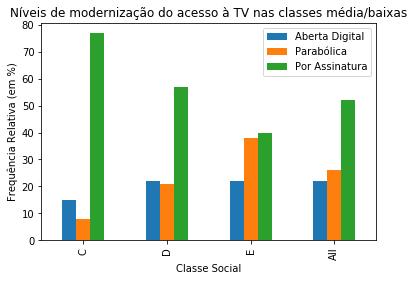

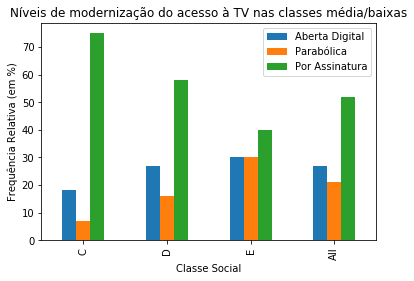

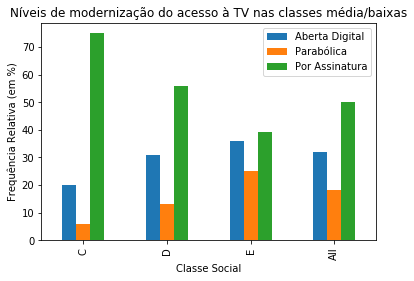

In [278]:
at13=(pd.crosstab(dados13["CLASSE"], dados13["Nível de Modernizacao"], margins=True, rownames=['CLASSE'], colnames=[''], normalize='index')*100).round(decimals=0)
plot=at13.iloc[0:7,].plot(kind='bar')
plt.ylabel('Frequência Relativa (em %)')
plt.xlabel("Classe Social")
plt.title("Níveis de modernização do acesso à TV nas classes média/baixas")

at14=(pd.crosstab(dados14["CLASSE"], dados14["Nível de Modernizacao"], margins=True, rownames=['CLASSE'], colnames=[''], normalize='index')*100).round(decimals=0)
plot=at14.iloc[0:7,].plot(kind='bar')
plt.ylabel('Frequência Relativa (em %)')
plt.xlabel("Classe Social")
plt.title("Níveis de modernização do acesso à TV nas classes média/baixas")

at15=(pd.crosstab(dados15["CLASSE"], dados15['Nível de Modernizacao'], margins=True, rownames=['CLASSE'], colnames=[''], normalize='index')*100).round(decimals=0)
plot=at15.iloc[0:7,].plot(kind='bar')
plt.ylabel('Frequência Relativa (em %)')
plt.xlabel("Classe Social")
plt.title("Níveis de modernização do acesso à TV nas classes média/baixas")

Para conclusão da ideia foram elaborados os três gráficos a seguir que ilustram com muita clareza como se deu a variação da proveniência de TV em cada uma das classes ao dos anos de 2013, 2014 e 2015. É possível perceber que, concordando com os gráficos previamente apresentados o percentual de TV por assinatura mudou muito pouco. Contudo, pode se perceber nos três gráficos a ascendência da TV aberta digital e a queda da televisão proveniente de antena parabólica. Inclusive, nota-se que esses últimos dois fenômenos descritos tem mais classes D e E enquanto ocorre mais discretamente na classe C.

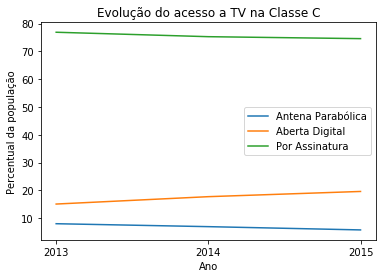

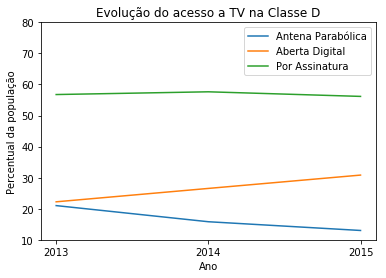

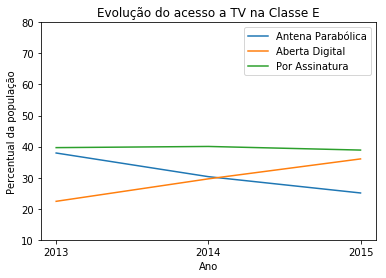

In [279]:
cp13=dados13.loc[dados13.CLASSE=='C','Nível de Modernizacao'].str.count('Parabólica').sum()
cad13=dados13.loc[dados13.CLASSE=='C','Nível de Modernizacao'].str.count('Aberta Digital').sum()
cpa13=dados13.loc[dados13.CLASSE=='C','Nível de Modernizacao'].str.count('Por Assinatura').sum()
ct13=cp13+cad13+cpa13
cp13=100*cp13/ct13
cad13=100*cad13/ct13
cpa13=100*cpa13/ct13
cp14=dados14.loc[dados14.CLASSE=='C','Nível de Modernizacao'].str.count('Parabólica').sum()
cad14=dados14.loc[dados14.CLASSE=='C','Nível de Modernizacao'].str.count('Aberta Digital').sum()
cpa14=dados14.loc[dados14.CLASSE=='C','Nível de Modernizacao'].str.count('Por Assinatura').sum()
ct14=cp14+cad14+cpa14
cp14=100*cp14/ct14
cad14=100*cad14/ct14
cpa14=100*cpa14/ct14
cp15=dados15.loc[dados15.CLASSE=='C','Nível de Modernizacao'].str.count('Parabólica').sum()
cad15=dados15.loc[dados15.CLASSE=='C','Nível de Modernizacao'].str.count('Aberta Digital').sum()
cpa15=dados15.loc[dados15.CLASSE=='C','Nível de Modernizacao'].str.count('Por Assinatura').sum()
ct15=cp15+cad15+cpa15
cp15=100*cp15/ct15
cad15=100*cad15/ct15
cpa15=100*cpa15/ct15

cP=[cp13,cp14,cp15]
cAD=[cad13,cad14,cad15]
cPA=[cpa13,cpa14,cpa15]

anos=['2013','2014','2015']
plt.plot(anos,cP)
plt.plot(anos,cAD)
plt.plot(anos,cPA)
plt.legend(["Antena Parabólica","Aberta Digital","Por Assinatura"])
plt.xlabel("Ano")
plt.ylabel("Percentual da população")
plt.title("Evolução do acesso a TV na Classe C")
plt.xticks([2013,2014,2015])
plt.yticks([10,20,30,40,50,60,70,80])
plt.show()

dp13=dados13.loc[dados13.CLASSE=='D','Nível de Modernizacao'].str.count('Parabólica').sum()
dad13=dados13.loc[dados13.CLASSE=='D','Nível de Modernizacao'].str.count('Aberta Digital').sum()
dpa13=dados13.loc[dados13.CLASSE=='D','Nível de Modernizacao'].str.count('Por Assinatura').sum()
dt13=dp13+dad13+dpa13
dp13=100*dp13/dt13
dad13=100*dad13/dt13
dpa13=100*dpa13/dt13
dp14=dados14.loc[dados14.CLASSE=='D','Nível de Modernizacao'].str.count('Parabólica').sum()
dad14=dados14.loc[dados14.CLASSE=='D','Nível de Modernizacao'].str.count('Aberta Digital').sum()
dpa14=dados14.loc[dados14.CLASSE=='D','Nível de Modernizacao'].str.count('Por Assinatura').sum()
dt14=dp14+dad14+dpa14
dp14=100*dp14/dt14
dad14=100*dad14/dt14
dpa14=100*dpa14/dt14
dp15=dados15.loc[dados15.CLASSE=='D','Nível de Modernizacao'].str.count('Parabólica').sum()
dad15=dados15.loc[dados15.CLASSE=='D','Nível de Modernizacao'].str.count('Aberta Digital').sum()
dpa15=dados15.loc[dados15.CLASSE=='D','Nível de Modernizacao'].str.count('Por Assinatura').sum()
dt15=dp15+dad15+dpa15
dp15=100*dp15/dt15
dad15=100*dad15/dt15
dpa15=100*dpa15/dt15

dP=[dp13,dp14,dp15]
dAD=[dad13,dad14,dad15]
dPA=[dpa13,dpa14,dpa15]

anos=['2013','2014','2015']
plt.plot(anos,dP)
plt.plot(anos,dAD)
plt.plot(anos,dPA)
plt.legend(["Antena Parabólica","Aberta Digital","Por Assinatura"])
plt.xlabel("Ano")
plt.ylabel("Percentual da população")
plt.title("Evolução do acesso a TV na Classe D")
plt.xticks([2013,2014,2015])
plt.yticks([10,20,30,40,50,60,70,80])
plt.show()

ep13=dados13.loc[dados13.CLASSE=='E','Nível de Modernizacao'].str.count('Parabólica').sum()
ead13=dados13.loc[dados13.CLASSE=='E','Nível de Modernizacao'].str.count('Aberta Digital').sum()
epa13=dados13.loc[dados13.CLASSE=='E','Nível de Modernizacao'].str.count('Por Assinatura').sum()
et13=ep13+ead13+epa13
ep13=100*ep13/et13
ead13=100*ead13/et13
epa13=100*epa13/et13
ep14=dados14.loc[dados14.CLASSE=='E','Nível de Modernizacao'].str.count('Parabólica').sum()
ead14=dados14.loc[dados14.CLASSE=='E','Nível de Modernizacao'].str.count('Aberta Digital').sum()
epa14=dados14.loc[dados14.CLASSE=='E','Nível de Modernizacao'].str.count('Por Assinatura').sum()
et14=ep14+ead14+epa14
ep14=100*ep14/et14
ead14=100*ead14/et14
epa14=100*epa14/et14
ep15=dados15.loc[dados15.CLASSE=='E','Nível de Modernizacao'].str.count('Parabólica').sum()
ead15=dados15.loc[dados15.CLASSE=='E','Nível de Modernizacao'].str.count('Aberta Digital').sum()
epa15=dados15.loc[dados15.CLASSE=='E','Nível de Modernizacao'].str.count('Por Assinatura').sum()
et15=ep15+ead15+epa15
ep15=100*ep15/et15
ead15=100*ead15/et15
epa15=100*epa15/et15

eP=[ep13,ep14,ep15]
eAD=[ead13,ead14,ead15]
ePA=[epa13,epa14,epa15]

anos=['2013','2014','2015']
plt.plot(anos,eP)
plt.plot(anos,eAD)
plt.plot(anos,ePA)
plt.legend(["Antena Parabólica","Aberta Digital","Por Assinatura"])
plt.xlabel("Ano")
plt.ylabel("Percentual da população")
plt.title("Evolução do acesso a TV na Classe E")
plt.xticks([2013,2014,2015])
plt.yticks([10,20,30,40,50,60,70,80])
plt.show()

Por fim, as bases de dados já "limpas" e filtradas foram salvas:

In [280]:
writer = pd.ExcelWriter('projeto1.15.xlsx', engine='xlsxwriter')
dados15.to_excel(writer, sheet_name='Projeto1')
writer.save()
writer = pd.ExcelWriter('projeto1.14.xlsx', engine='xlsxwriter')
dados14.to_excel(writer, sheet_name='Projeto1')
writer.save()
writer = pd.ExcelWriter('projeto1.13.xlsx', engine='xlsxwriter')
dados13.to_excel(writer, sheet_name='Projeto1')
writer.save()

___
## Conclusão 

Apés a analise de todos os gráficos anteriormente apresentados, é possível concluir que durante os anos anos em questão houve sim uma modernização quanto ao acesso à televisão por parte das classes baixas e média (C, D e E) no Sudeste do Brasil. Dentre as proveniências de TV analisadas, houve pouca variação em relação à TV por assinatura (considerada a mais moderna e cara) porém pode se notar uma evolução considerada, principalmente das classes D e E, que consiste numa troca da TV por antena parabólica pelo sinal de televisão digital (por mais que ainda assim aberto). Isso pode significar que a evolução se deu graças ao avanço e maior acessibilidade de tecnologias uma vez que o produto  que a princípio seria mais caro (TV por assinatura) teve pouca mudança. Simultaneamente, aonde não haveria, a princípio, a necessidade de um maior investimento, e sim só de uma avanço tecnológico, houve a modernização esperada.